In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
book_df = pd.read_csv('book.csv')
book_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
frequent_itemsets = apriori(book_df, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [7]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,0.64185


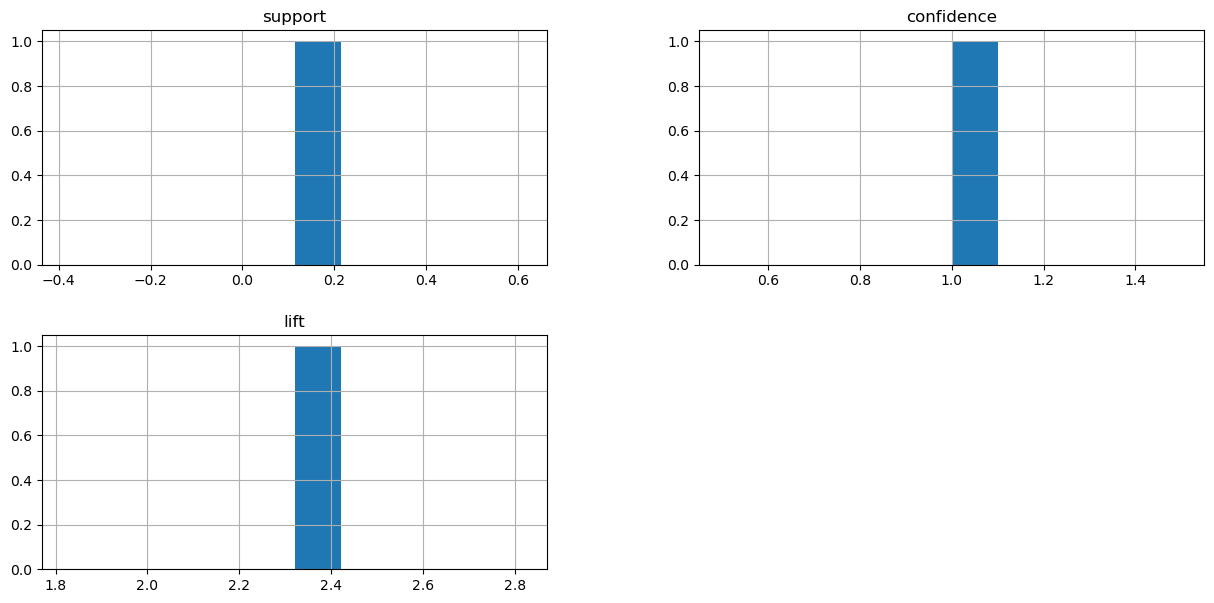

In [9]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

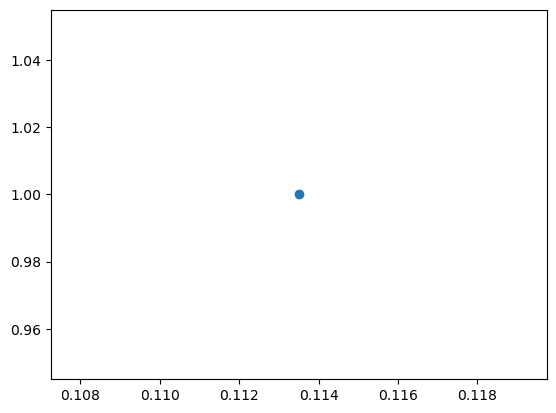

In [11]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

In [10]:
frequent_itemsets1 = apriori(book_df, min_support=0.05, use_colnames=True)
frequent_itemsets1

C:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, CookBks, DoItYBks)"
96,0.0560,"(YouthBks, GeogBks, CookBks, ArtBks)"
97,0.0650,"(GeogBks, CookBks, ArtBks, DoItYBks)"
98,0.0510,"(ChildBks, YouthBks, GeogBks, CookBks, DoItYBks)"


In [12]:
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
1,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902,0.549148
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481,0.562478
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884,0.551605
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
...,...,...,...,...,...,...,...,...,...,...
57,"(GeogBks, ArtBks, DoItYBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125,0.556585
58,"(ChildBks, YouthBks, GeogBks, DoItYBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182,0.553810
59,"(YouthBks, GeogBks, CookBks, DoItYBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667,0.534418
60,"(ChildBks, GeogBks, ArtBks, DoItYBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583,0.553603


In [13]:
rules1.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf,0.621858
22,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf,0.603074
19,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf,0.604355
15,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf,0.604676
...,...,...,...,...,...,...,...,...,...,...
5,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
12,"(YouthBks, RefBks)",(CookBks),0.0965,0.431,0.0775,0.803109,1.863362,0.035908,2.889921,0.512823
43,"(ChildBks, RefBks, ArtBks)",(CookBks),0.0760,0.431,0.0610,0.802632,1.862254,0.028244,2.882933,0.501100
13,"(YouthBks, ArtBks)",(CookBks),0.1010,0.431,0.0810,0.801980,1.860743,0.037469,2.873450,0.514550


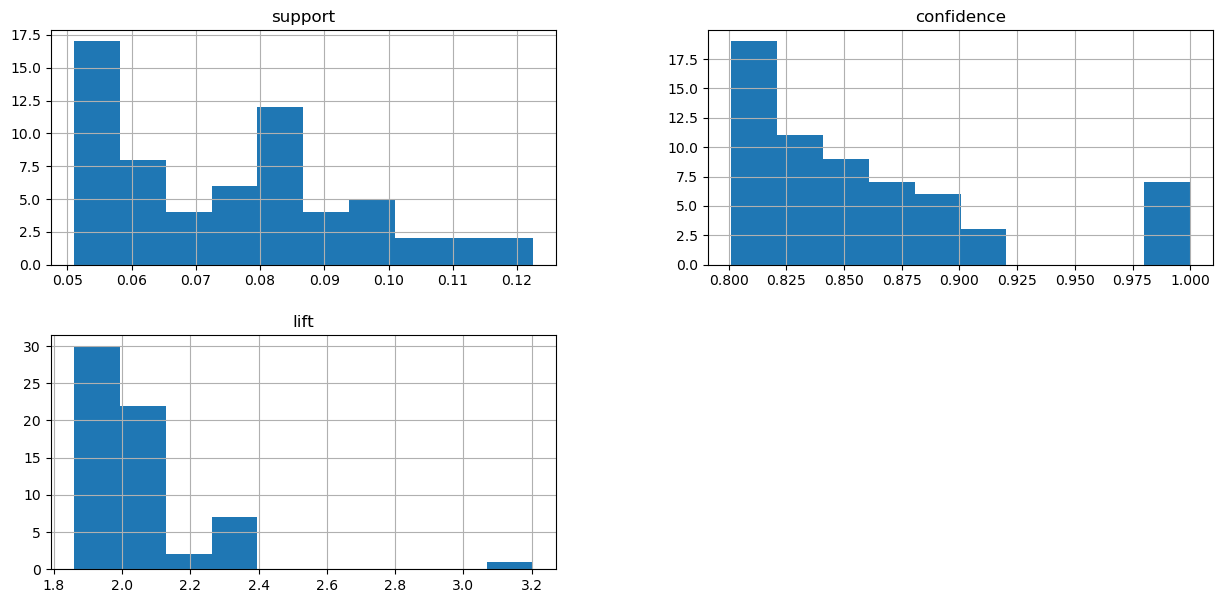

In [15]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

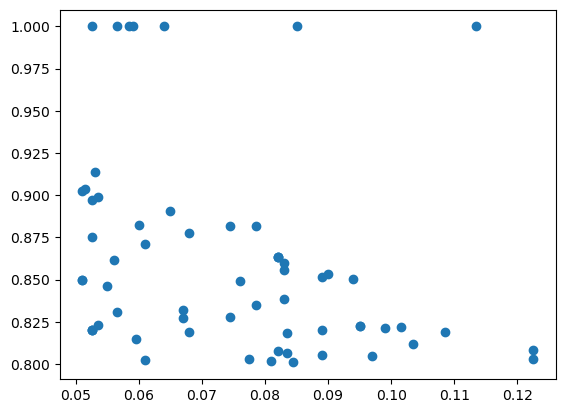

In [16]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.show()

In [17]:
frequent_itemsets2 = apriori(book_df, min_support=0.2, use_colnames=True, max_len=5)
frequent_itemsets2

C:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [20]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


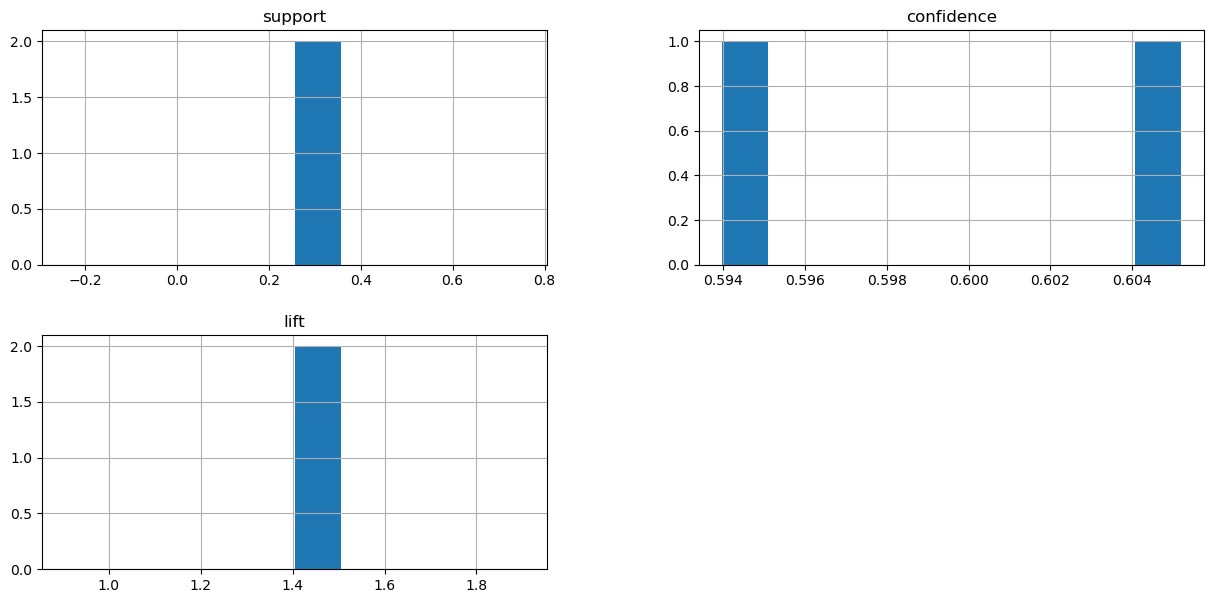

In [21]:
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

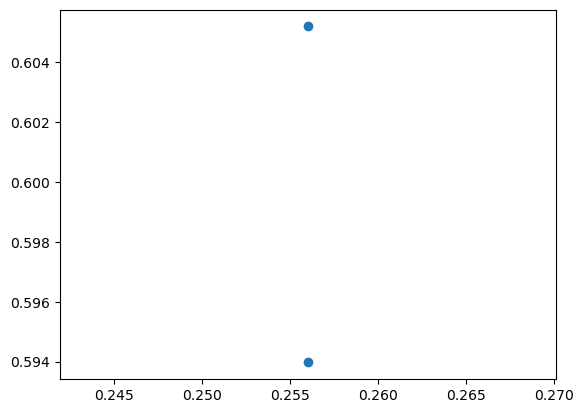

In [22]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.show()